In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
original_dir = Path('../data/original')
ana_filename = original_dir / 'analysis-seg-predictions.h5'
with h5py.File(ana_filename, 'r') as h5:
    top1    = h5['top_1'][:]
    top10000 = h5['top_10000'][:]
    top50000 = h5['top_50000'][:]

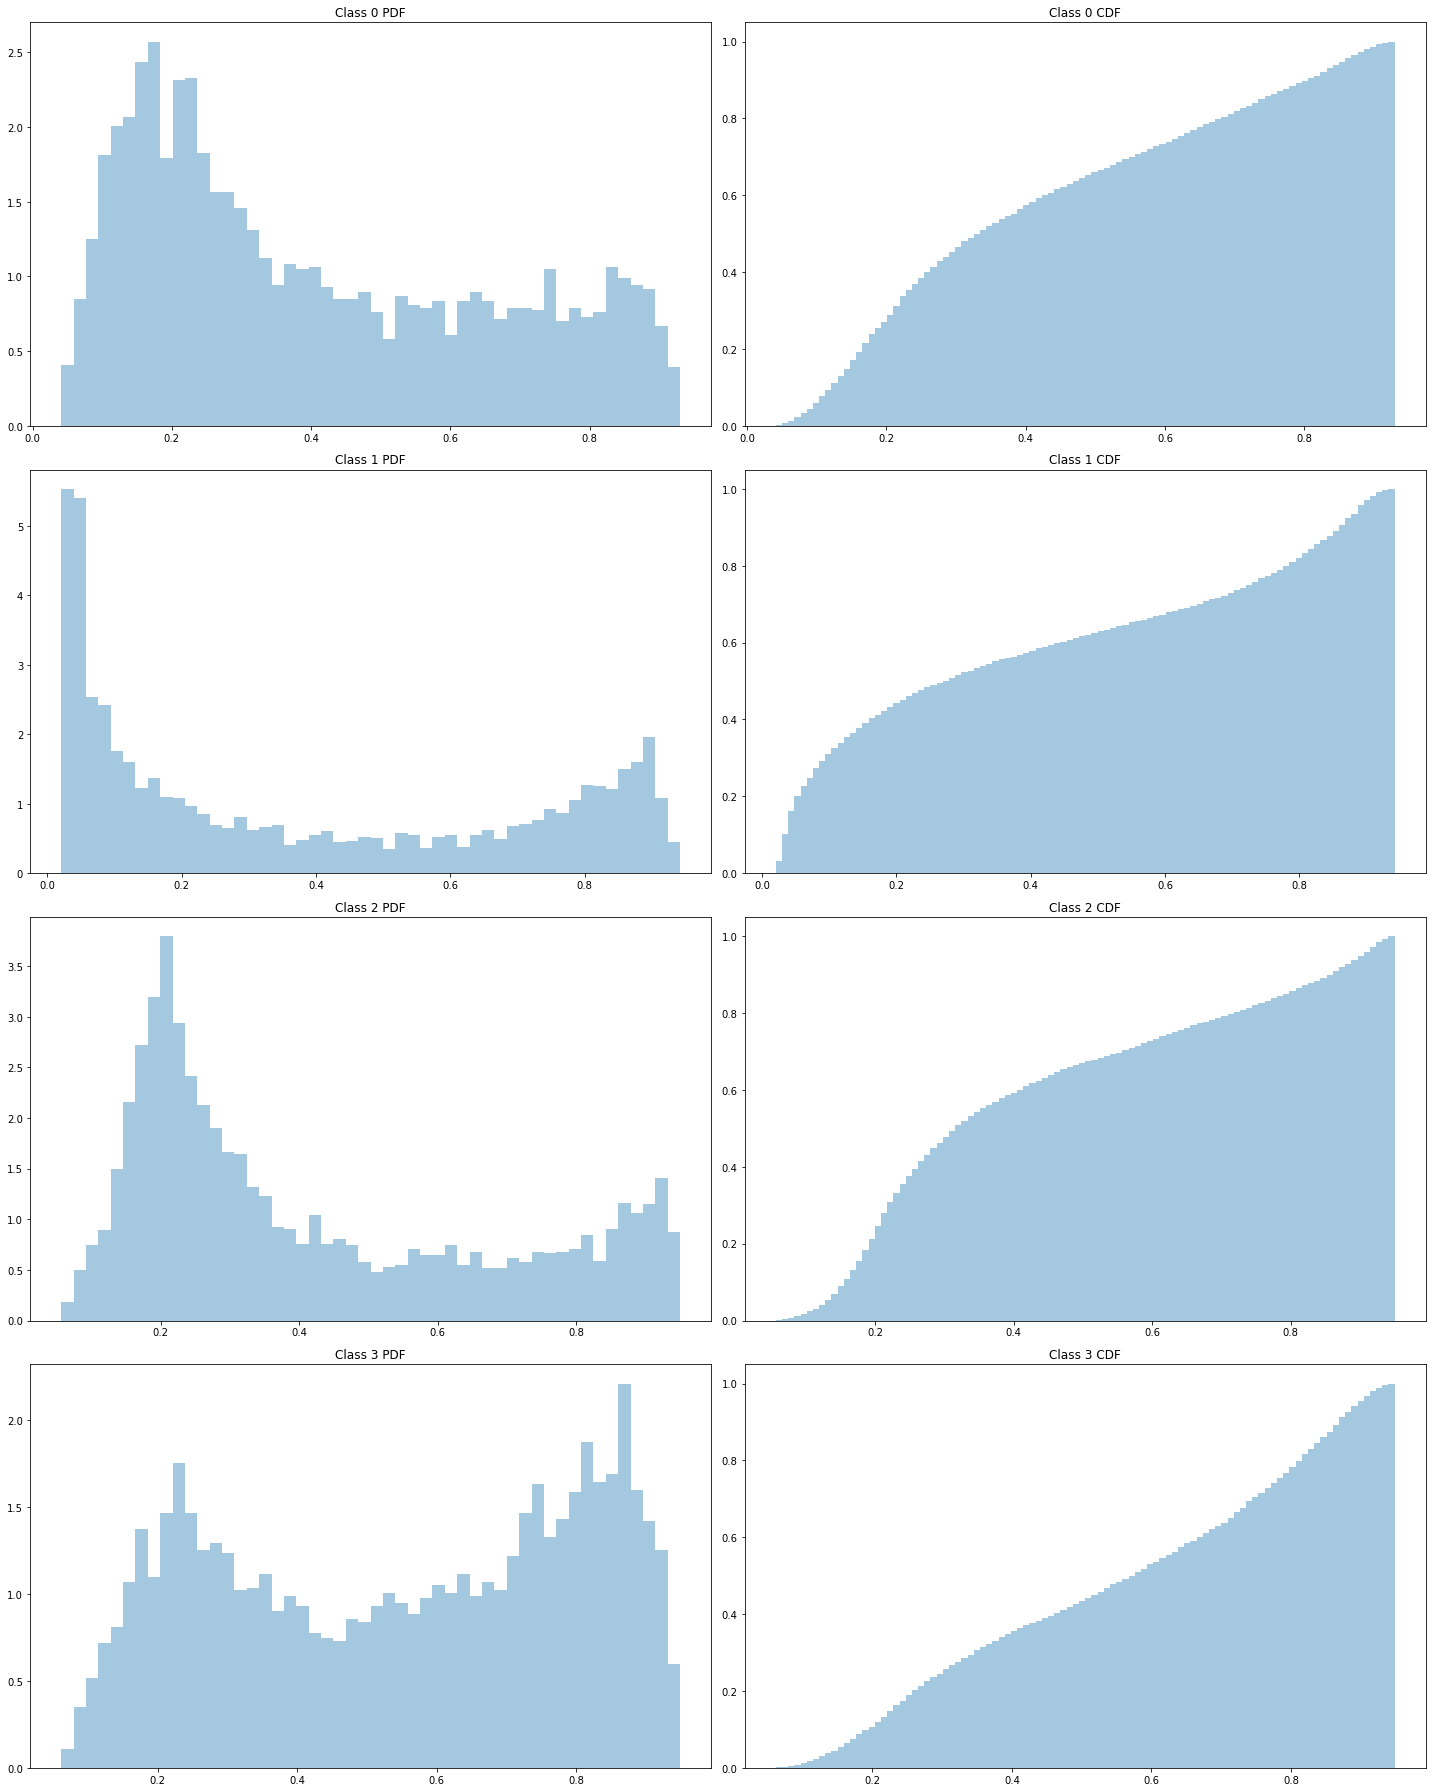

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(20, 25))
approx_dist = [0.501, 0.426, 0.530, 0.676]
kwargs = {'cumulative': True}
for c in range(4):
    for data in reversed([top1]):
        sns.distplot(data[:, c], bins=50, kde=False, norm_hist=True, ax=axs[c, 0])
        sns.distplot(data[:, c], bins=100, kde=False, norm_hist=True, ax=axs[c, 1], hist_kws=kwargs, kde_kws=kwargs)
        axs[c, 0].set_title(f'Class {c} PDF')
        axs[c, 1].set_title(f'Class {c} CDF')
# fig.suptitle('Average Segmentation Top 1 Prediction Distribution')
fig.tight_layout()
plt.show()
fig.savefig('../resources/average-prediction-distribution.png')

In [98]:
pseudo_dir = Path('../data/pseudo')
ana_filename = pseudo_dir / 'analysis-seg-predictions.h5'
with h5py.File(ana_filename, 'r') as h5:
    top1     = h5['top_1'][:]
    top4000  = h5['top_4000'][:]
    top10000 = h5['top_10000'][:]

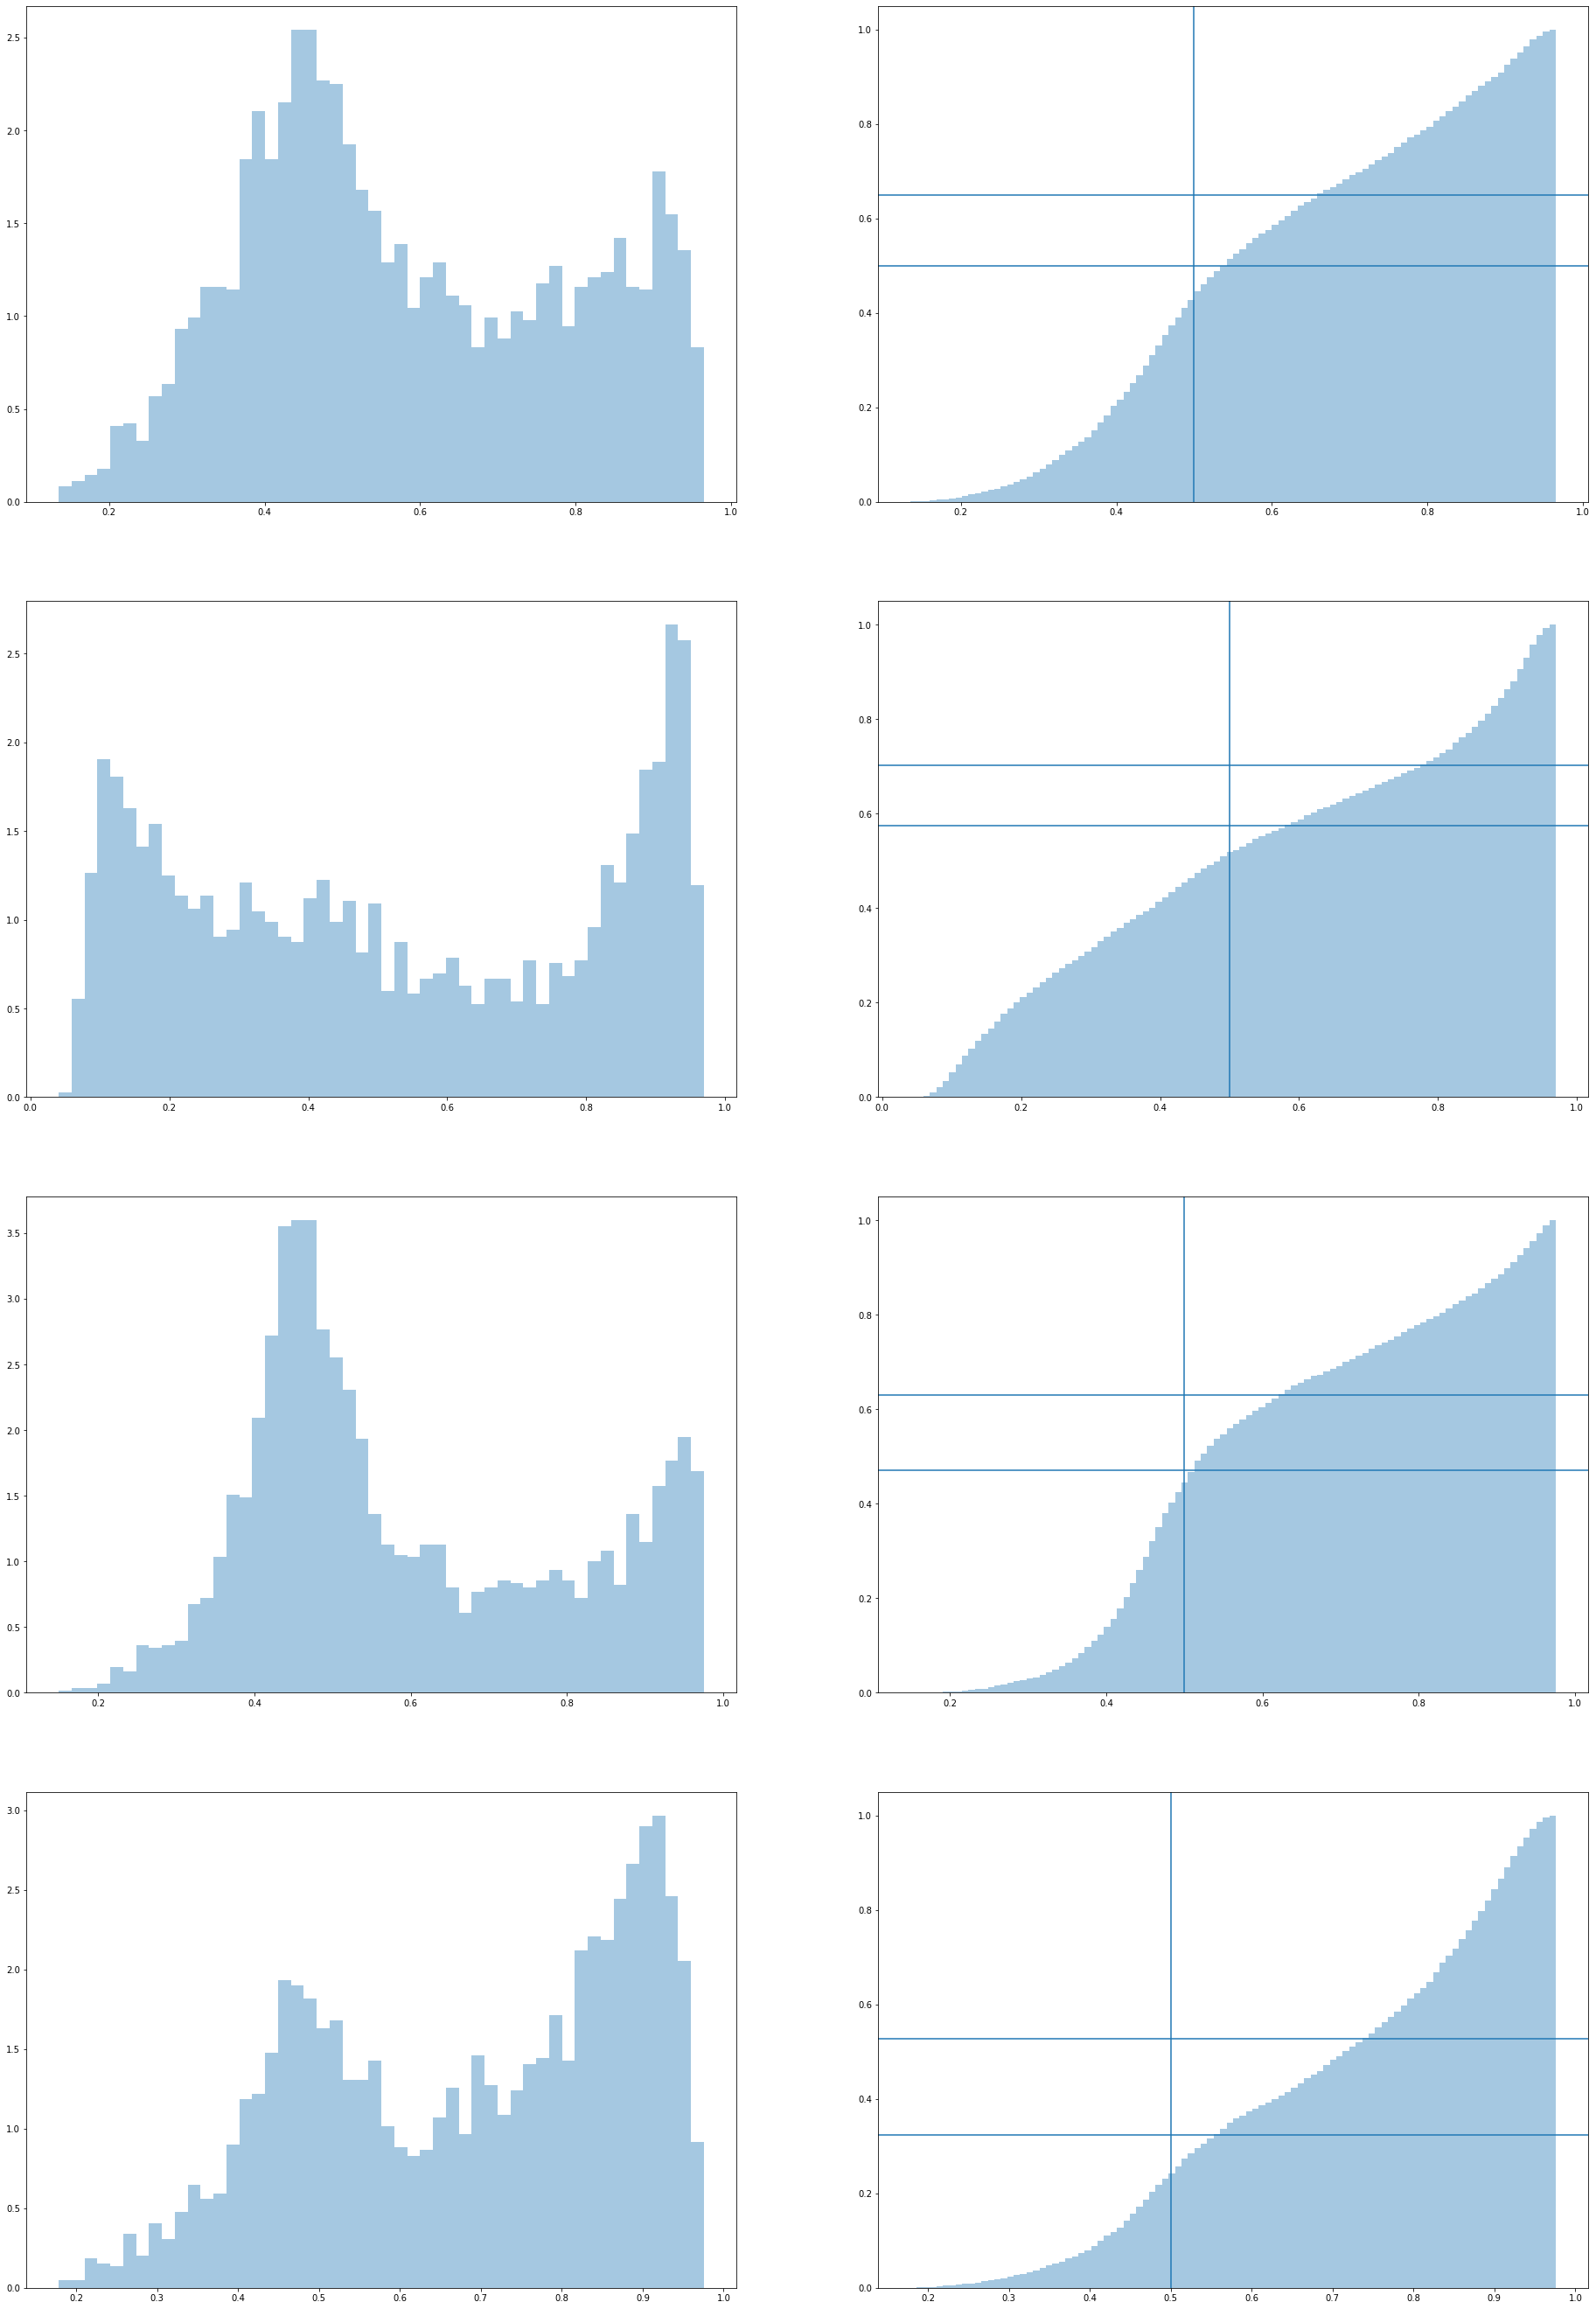

In [100]:
fig, axs = plt.subplots(4, 2, figsize=(32, 48))
approx_dist = [0.501, 0.426, 0.530, 0.676]
kwargs = {'cumulative': True}
for c in range(4):
    for data in reversed([top4000]):
        sns.distplot(data[:, c], bins=50, kde=False, norm_hist=True, ax=axs[c, 0])
        sns.distplot(data[:, c], bins=100, kde=False, norm_hist=True, ax=axs[c, 1], hist_kws=kwargs, kde_kws=kwargs)
        axs[c, 1].axhline(y=1 - approx_dist[c])
        axs[c, 1].axhline(y=1 - approx_dist[c] * 0.7)
        axs[c, 1].axvline(x=0.5)
plt.show()

In [85]:
original_filename = original_dir / 'analysis-seg-predictions.h5'
pseudo_filename   = pseudo_dir / 'analysis-seg-predictions.h5'
with h5py.File(original_filename, 'r') as h5:
    top1_or = h5['top_50000'][:]
with h5py.File(pseudo_filename, 'r') as h5:
    top1_ps = h5['top_50000'][:]

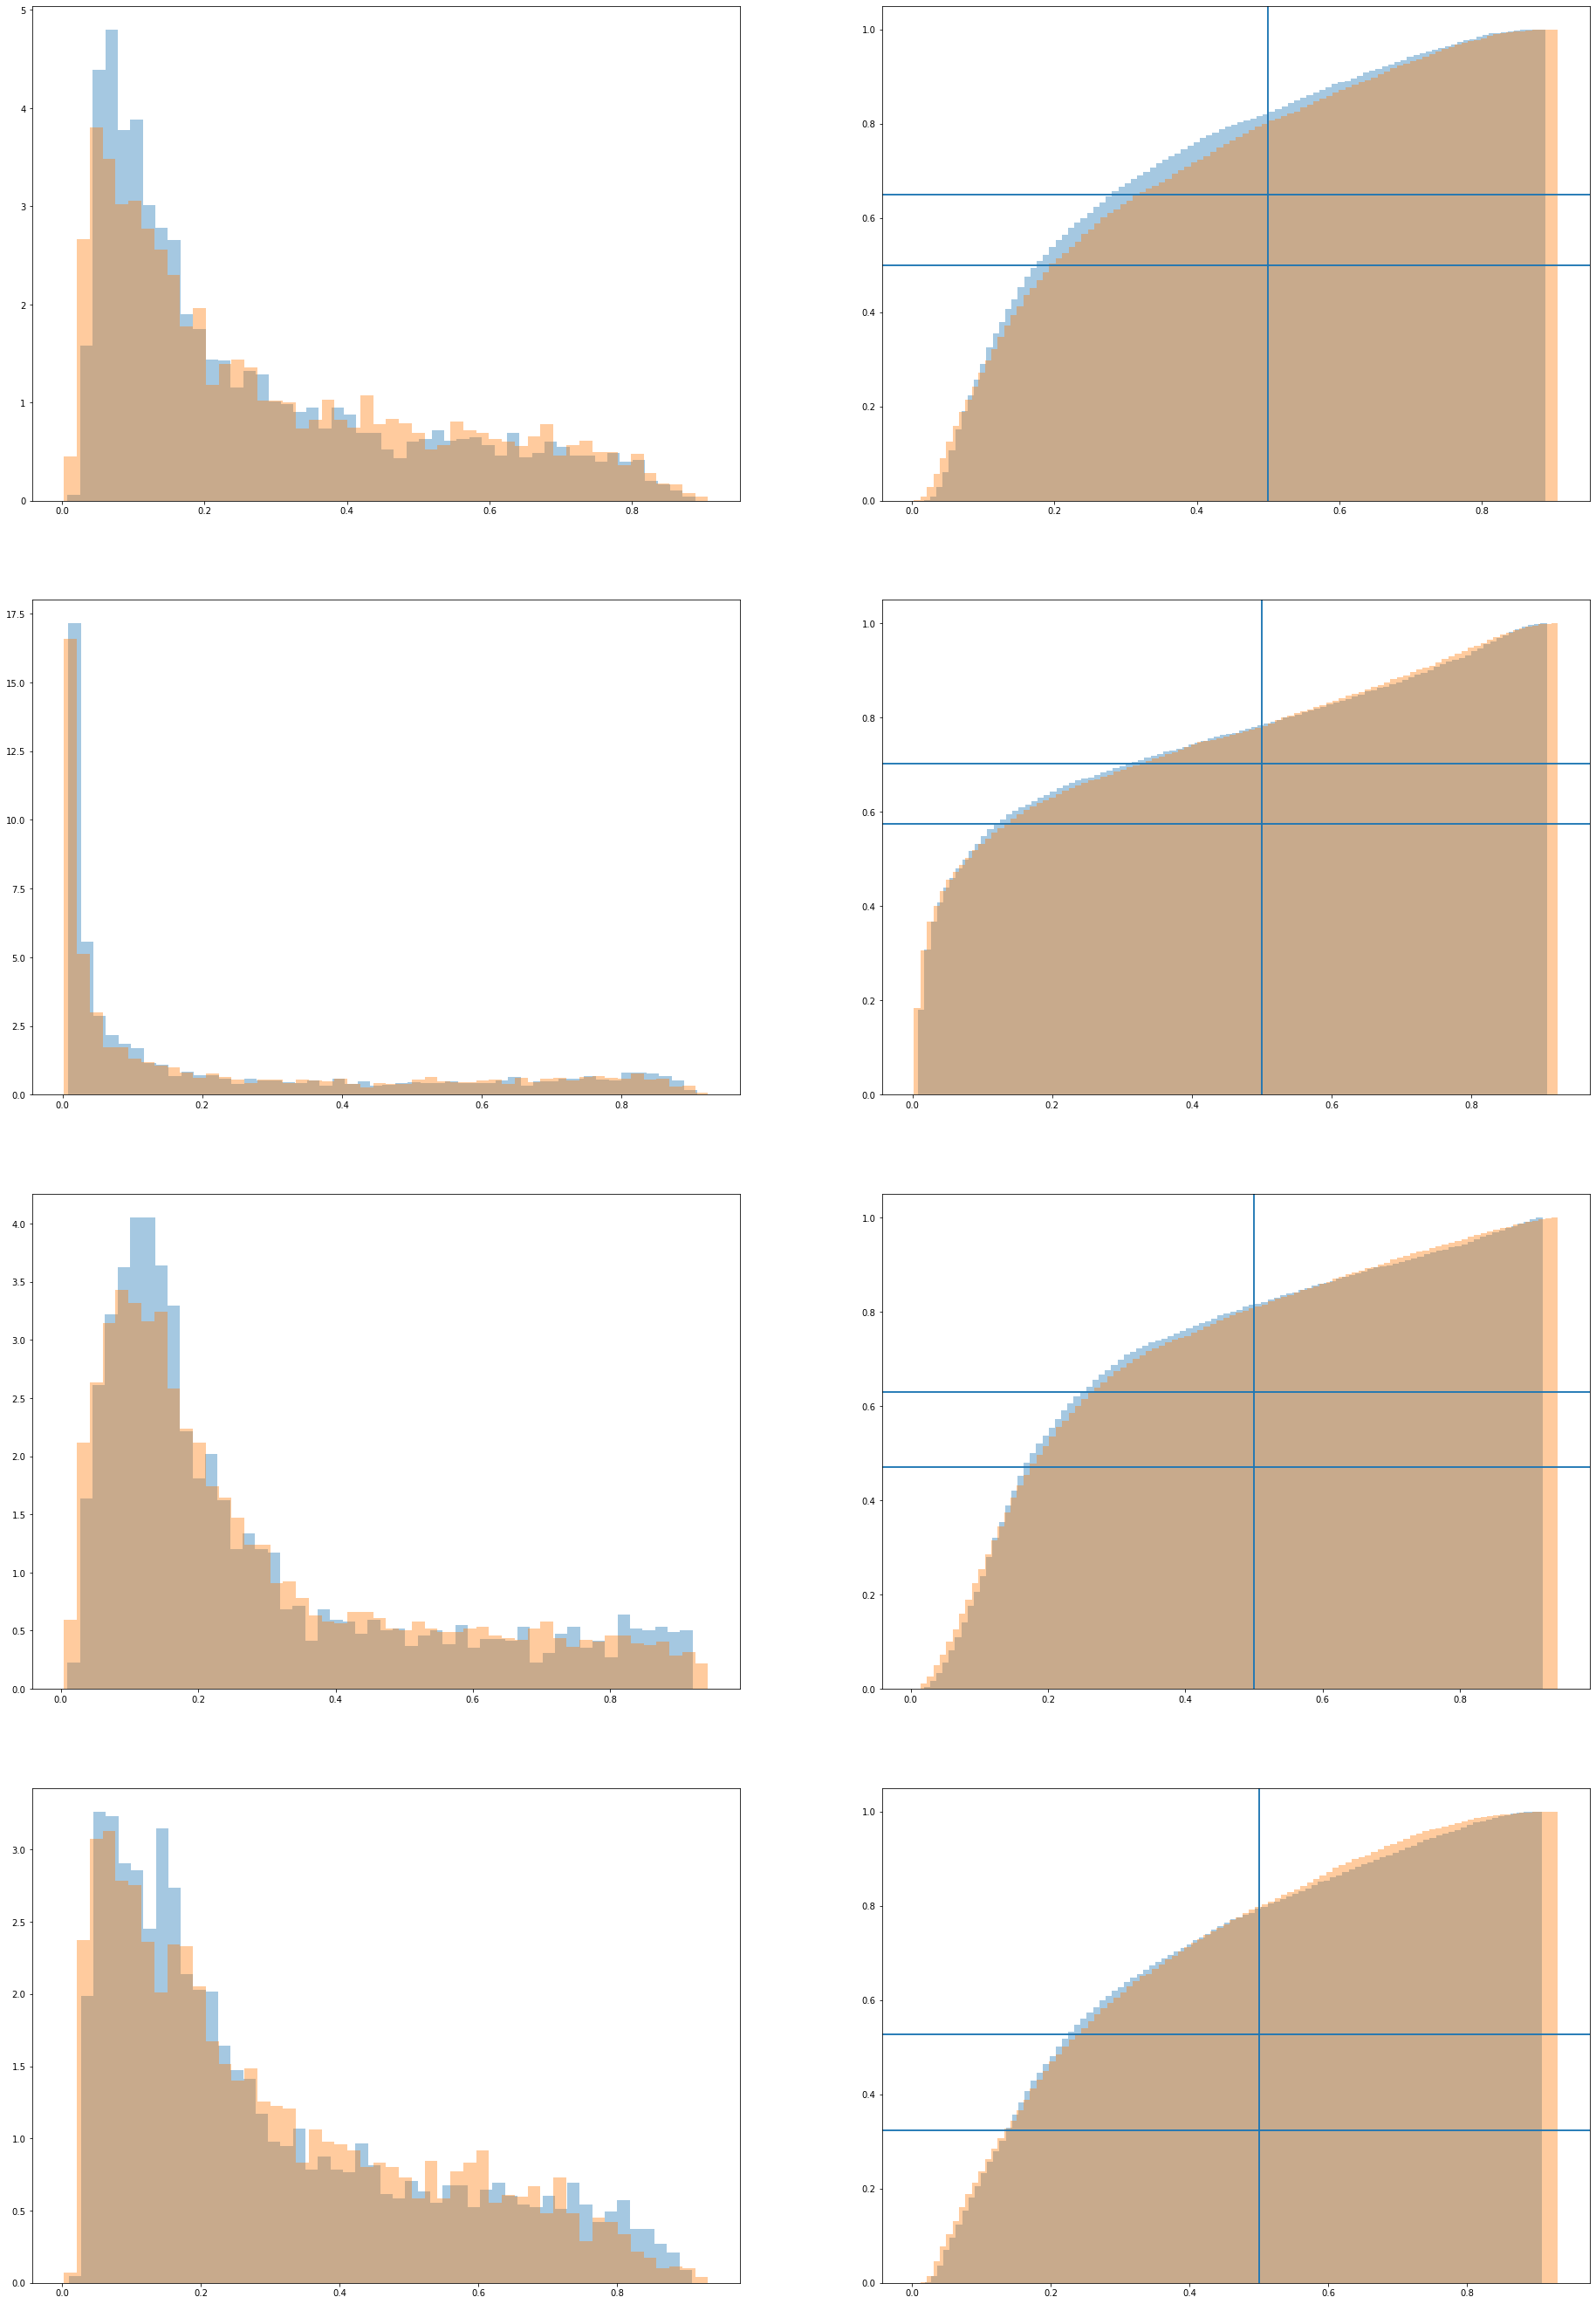

In [86]:
fig, axs = plt.subplots(4, 2, figsize=(32, 48))
approx_dist = [0.501, 0.426, 0.530, 0.676]
kwargs = {'cumulative': True}
for c in range(4):
    for data in [top1_or, top1_ps]:
        sns.distplot(data[:, c], bins=50, kde=False, norm_hist=True, ax=axs[c, 0])
        sns.distplot(data[:, c], bins=100, kde=False, norm_hist=True, ax=axs[c, 1], hist_kws=kwargs, kde_kws=kwargs)
        axs[c, 1].axhline(y=1 - approx_dist[c])
        axs[c, 1].axhline(y=1 - approx_dist[c] * 0.7)
        axs[c, 1].axvline(x=0.5)
plt.show()

In [81]:
clas_filename = original_dir / 'avg-clas-predictions.h5'
with h5py.File(clas_filename, 'r') as h5:
    clas_avg = h5['average'][:]

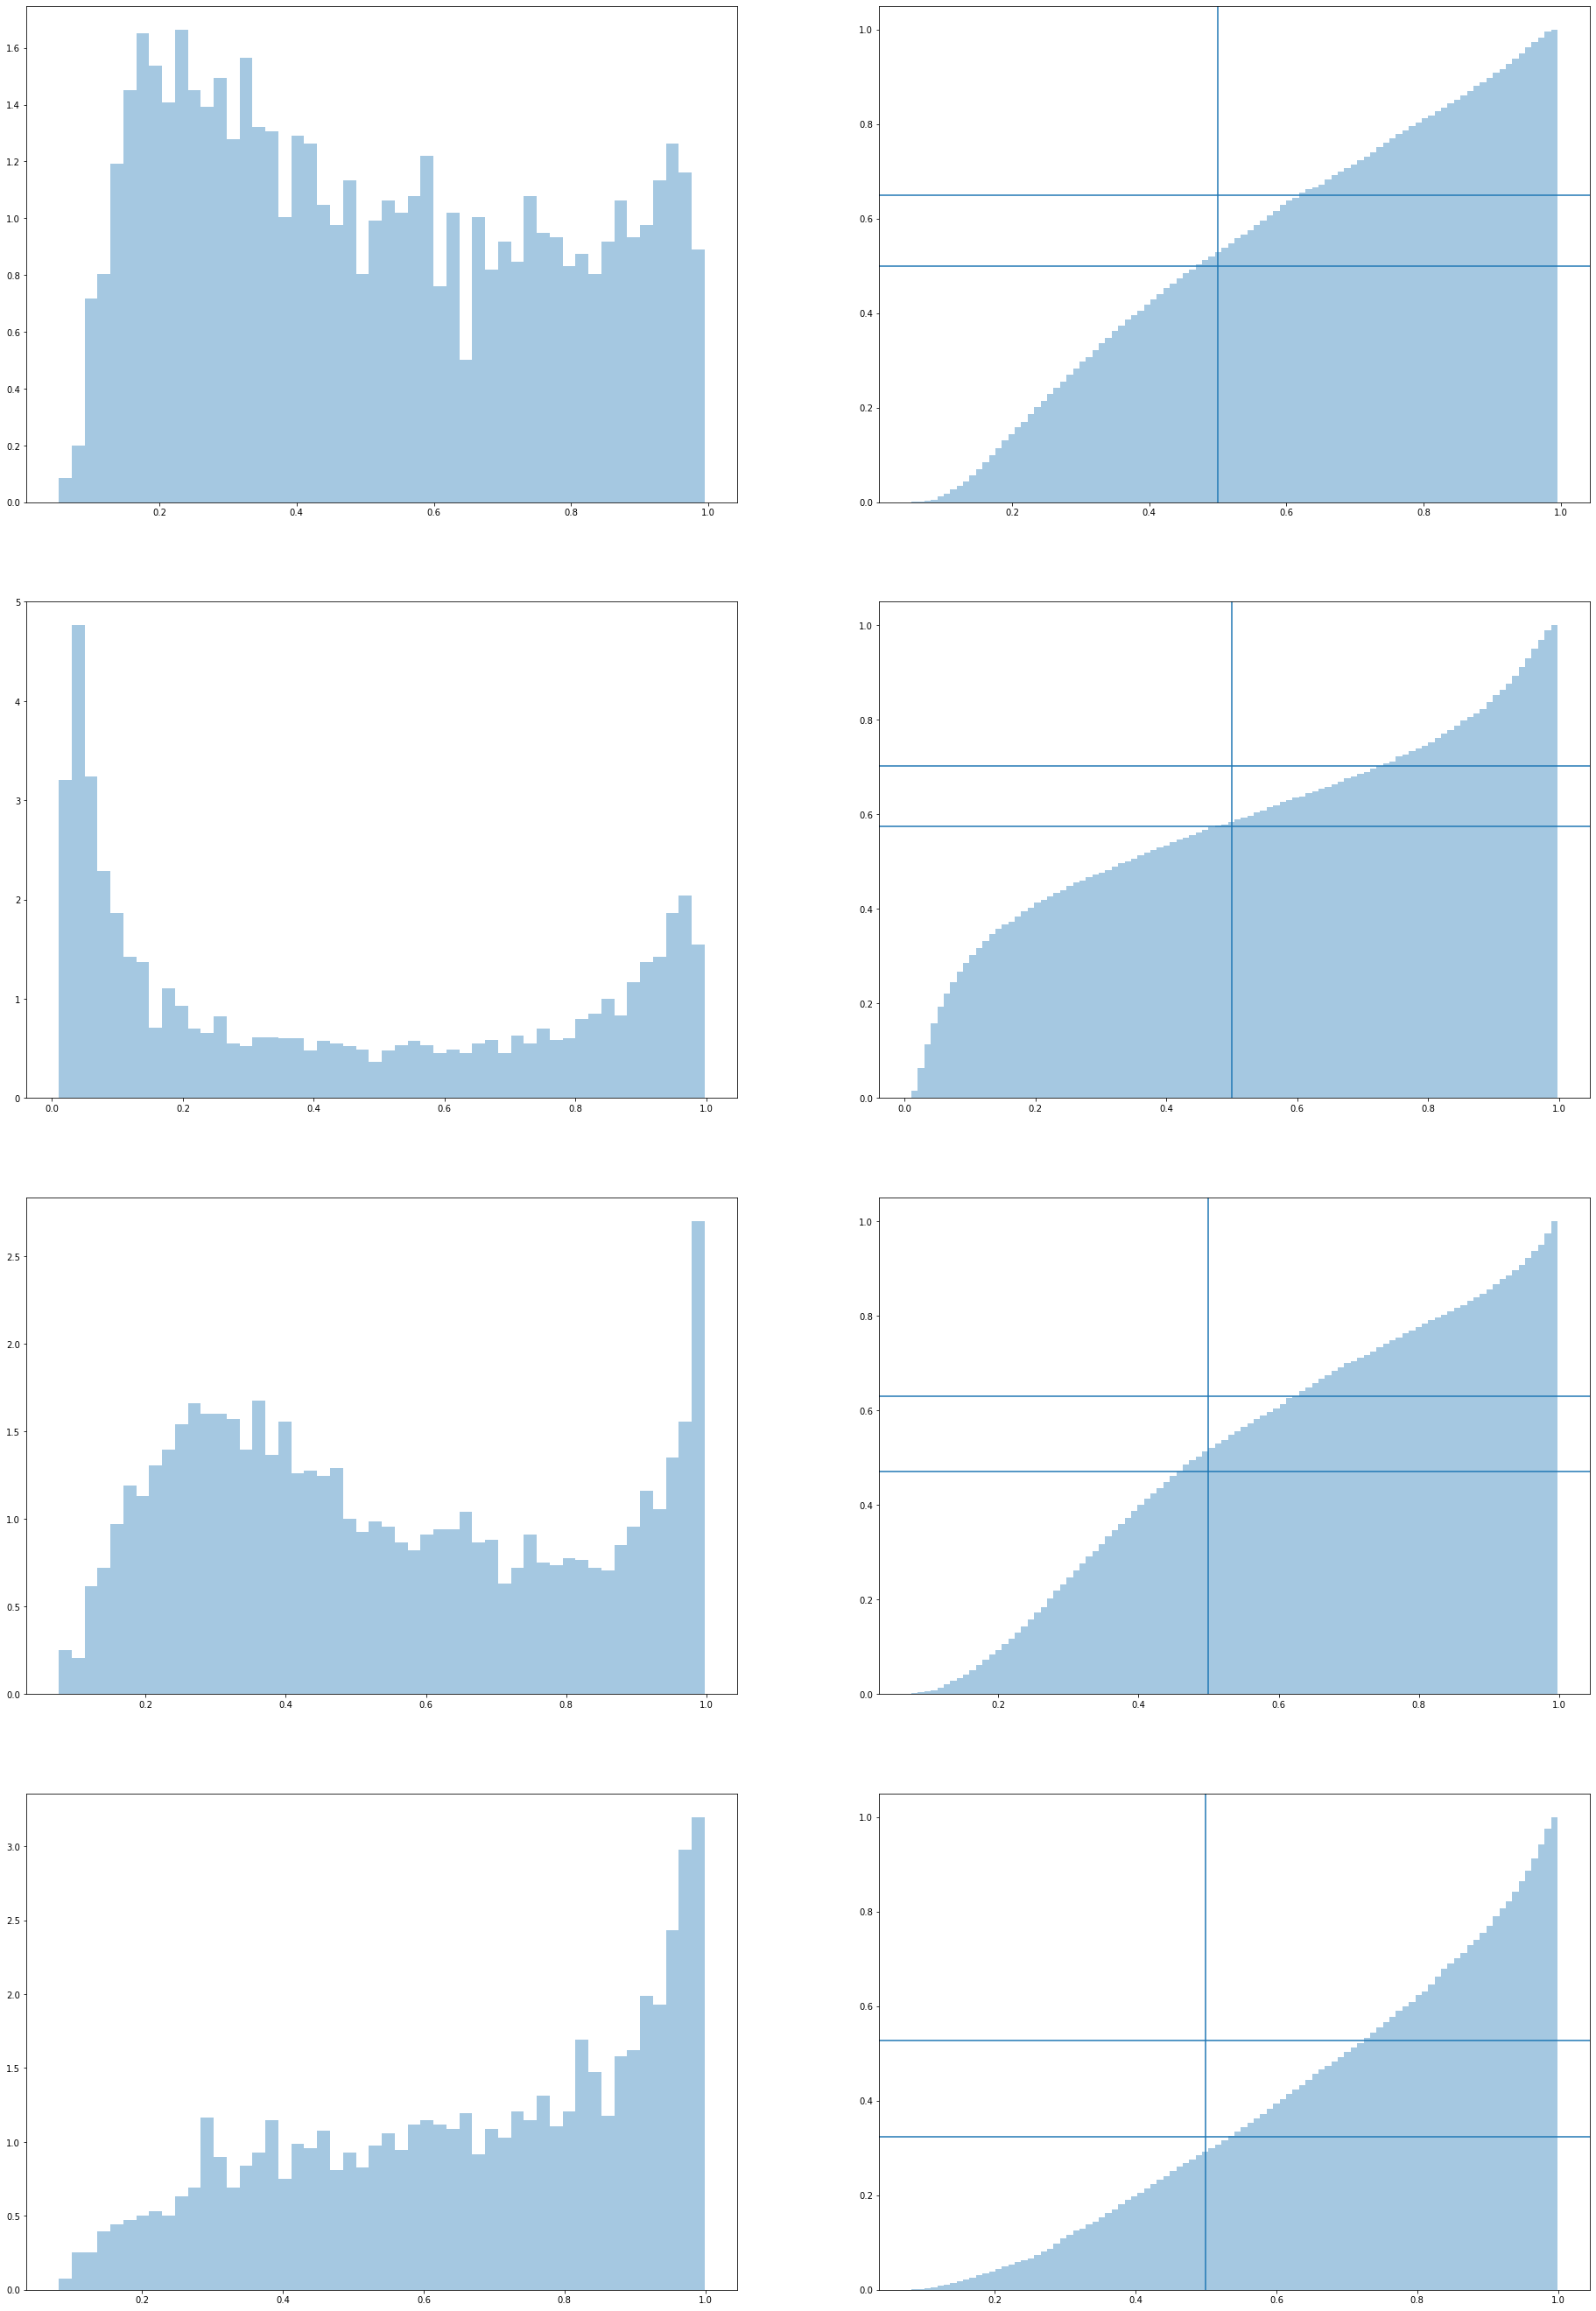

In [82]:
fig, axs = plt.subplots(4, 2, figsize=(32, 48))
approx_dist = [0.501, 0.426, 0.530, 0.676]
kwargs = {'cumulative': True}
for c in range(4):
    sns.distplot(clas_avg[:, c], bins=50, kde=False, norm_hist=True, ax=axs[c, 0])
    sns.distplot(clas_avg[:, c], bins=100, kde=False, norm_hist=True, ax=axs[c, 1], hist_kws=kwargs, kde_kws=kwargs)
    axs[c, 1].axhline(y=1 - approx_dist[c])
    axs[c, 1].axhline(y=1 - approx_dist[c] * 0.7)
    axs[c, 1].axvline(x=0.5)
plt.show()

In [94]:
c = 0
df = pd.DataFrame({
    'top1': top1[c],
    'top10000': top10000[c],
    'top50000': top50000[c],
    'clas': clas_avg[c]
})
df.head()

,top1,top10000,top50000,clas
0,0.327844,0.295822,0.189536,0.133647
1,0.140344,0.088108,0.056485,0.057997
2,0.971256,0.969400,0.947244,0.995090
3,0.461510,0.446762,0.401300,0.386349


In [95]:
df.corr()

,top1,top10000,top50000,clas
top1,1.000000,0.999745,0.996510,0.989531
top10000,0.999745,1.000000,0.996035,0.988052
top50000,0.996510,0.996035,1.000000,0.997693
clas,0.989531,0.988052,0.997693,1.000000


In [ ]:
np.sort([8, 2, 3, 10, 1, 12])

In [ ]:
a = np.ones((256, 256))
a = a.reshape(-1)


In [ ]:
256 * 256